# **Tugas 1 Data Mining - Preprocessing Data**
**Nama Kelompok**

1. Gusti Ayu Putu Putri Febriyanti (180030278)
2. Putu Andika Tedja Permana (180030302)
3. Dewa Ayu Rista Ristiyanti (180030562)
4. Komang Bhargo Bhaskara (180031226)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install klib --quiet # install klib jika belum terinstall
import klib

plt.style.use('seaborn')

**Loading Dataset**

In [2]:
df = pd.read_csv('UmbilicalCord.csv')

## **Analisis Dataset**
Melakukan analisis terhadap dataset dengan menampilkan: head, tail, info, describe, jenis data, dan unique sample

In [3]:
df.head()

,V1,V2,V3,V4,V4.1,V5,class
0,0.445238,0.505075,-0.820383,0.995991,Yes,0.032069,1
1,0.498504,0.439431,-0.542831,0.931170,No,0.550642,1
2,0.510062,0.439431,-0.542831,0.931170,Yes,0.550642,1
3,0.239149,0.463595,-0.744533,0.997584,No,0.019329,1
4,0.348374,0.464238,-0.599760,0.951383,Yes,0.388940,1


In [4]:
df.tail()

,V1,V2,V3,V4,V4.1,V5,class
150,2.200000,9.300000,8.800000,1.200000,No,0.513023,3
151,0.395254,0.529118,-0.499564,0.917122,No,0.513023,3
152,0.395254,0.529118,-0.499564,0.917122,No,0.513023,3
153,0.395254,0.529118,-0.499564,0.917122,No,0.513023,3
154,0.395254,0.529118,-0.499564,0.917122,No,0.513023,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      155 non-null    float64
 1   V2      155 non-null    float64
 2   V3      155 non-null    float64
 3   V4      155 non-null    float64
 4   V4.1    155 non-null    object 
 5   V5      155 non-null    float64
 6   class   155 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 8.6+ KB


In [6]:
df.describe()

,V1,V2,V3,V4,V5,class
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.350758,0.553388,-0.654627,0.972712,0.228065,1.387097
std,0.211658,0.709359,0.774883,0.027742,0.159290,0.638455
min,0.105265,0.415673,-0.892557,0.909939,0.018468,1.000000
25%,0.239914,0.467779,-0.816754,0.960645,0.121234,1.000000
50%,0.328511,0.484382,-0.752914,0.979913,0.162336,1.000000
75%,0.422336,0.513363,-0.621163,0.985168,0.318311,2.000000
max,2.200000,9.300000,8.800000,1.200000,0.720484,3.000000


In [7]:
df.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
V4.1      object
V5       float64
class      int64
dtype: object

In [8]:
list_item = []
for col in df.columns:
    list_item.append([col,                                    # Feature
                      df[col].dtype,                          # Data_type
                      df[col].isna().sum(),                   # Null_num
                      100*df[col].isna().sum()/len(df[col]),  # Null_pct
                      df[col].unique(),                       # Unique_num
                      df[col].unique()[:4]])                  # Unique_sample
desc_df = pd.DataFrame(data=list_item, columns='Feature Data_type Null_num Null_pct Unique_num Unique_sample'.split()) 
desc_df

,Feature,Data_type,Null_num,Null_pct,Unique_num,Unique_sample
0,V1,float64,0,0.0,"[0.44523846200000006, 0.498503907, 0.510062189...","[0.44523846200000006, 0.498503907, 0.510062189..."
1,V2,float64,0,0.0,"[0.505075484, 0.439430528, 0.463595125, 0.4642...","[0.505075484, 0.439430528, 0.463595125, 0.4642..."
2,V3,float64,0,0.0,"[-0.8203833979999999, -0.5428305170000001, -0....","[-0.8203833979999999, -0.5428305170000001, -0...."
3,V4,float64,0,0.0,"[0.995991373, 0.9311697940000001, 0.9975838709...","[0.995991373, 0.9311697940000001, 0.9975838709..."
4,V4.1,object,0,0.0,"[Yes, No]","[Yes, No]"
5,V5,float64,0,0.0,"[0.032069017000000005, 0.55064165, 0.019329032...","[0.032069017000000005, 0.55064165, 0.019329032..."
6,class,int64,0,0.0,"[1, 2, 3]","[1, 2, 3]"


## **Input Missing Value**

Cek apakah terdapat nilai kosong atau missing value dari setiap kolom

In [9]:
df.isna().sum()

V1       0
V2       0
V3       0
V4       0
V4.1     0
V5       0
class    0
dtype: int64

*Karena tidak terdapat missing value, maka tahapan ini dilewati*

## **Handling Categorical Data**
Mengubah data kategorikal non angka menjadi angka

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

### Menggunakan One Hot Encoder

In [11]:
X = df.iloc[:, :-1]
y = df['class']

In [12]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X_onehot = np.array(ct.fit_transform(X))

In [13]:
X_onehot

array([[ 0.        ,  1.        ,  0.44523846, ..., -0.8203834 ,
         0.99599137,  0.03206902],
       [ 1.        ,  0.        ,  0.49850391, ..., -0.54283052,
         0.93116979,  0.55064165],
       [ 0.        ,  1.        ,  0.51006219, ..., -0.54283052,
         0.93116979,  0.55064165],
       ...,
       [ 1.        ,  0.        ,  0.39525445, ..., -0.49956389,
         0.9171221 ,  0.51302318],
       [ 1.        ,  0.        ,  0.39525445, ..., -0.49956389,
         0.9171221 ,  0.51302318],
       [ 1.        ,  0.        ,  0.39525445, ..., -0.49956389,
         0.9171221 ,  0.51302318]])

### Menggunakan Pandas Dummies

In [14]:
X = df.iloc[:, :-1]
y = df['class']

In [15]:
X_dummies = pd.get_dummies(X)

In [16]:
X_dummies

,V1,V2,V3,V4,V5,V4.1_No,V4.1_Yes
0,0.445238,0.505075,-0.820383,0.995991,0.032069,0,1
1,0.498504,0.439431,-0.542831,0.931170,0.550642,1,0
2,0.510062,0.439431,-0.542831,0.931170,0.550642,0,1
3,0.239149,0.463595,-0.744533,0.997584,0.019329,1,0
4,0.348374,0.464238,-0.599760,0.951383,0.388940,0,1
...,...,...,...,...,...,...,...
150,2.200000,9.300000,8.800000,1.200000,0.513023,1,0
151,0.395254,0.529118,-0.499564,0.917122,0.513023,1,0
152,0.395254,0.529118,-0.499564,0.917122,0.513023,1,0
153,0.395254,0.529118,-0.499564,0.917122,0.513023,1,0


## **Analisis Korelasi Fitur**
Menggunakan feature pearson pada library Klib

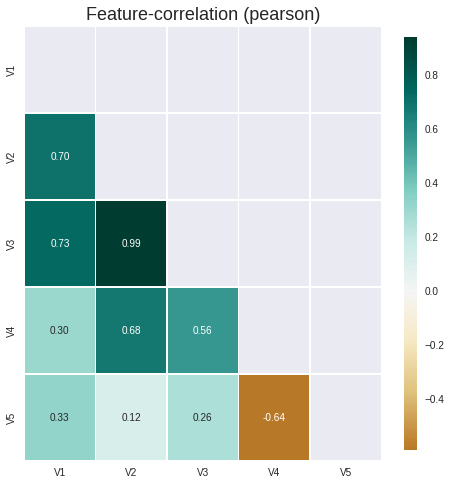

In [17]:
# Korelasi pada data yang belum dilakukan categorical encoding
klib.corr_plot(X, annot=True, figsize=(8,8))

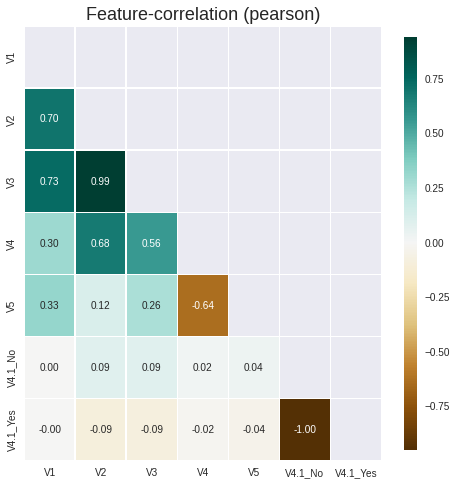

In [18]:
# Korelasi pada data yang telah dilakukan categorical encoding (menggunakan data pandas dummies)
klib.corr_plot(X_dummies, annot=True, figsize=(8,8))

## **Outlier Detection**
Melakukan outlier detection menggunakan algoritma Isolation Forest

In [19]:
from sklearn.ensemble import IsolationForest

Deteksi outlier pada data yang telah di encode dengan one hot encoding

In [20]:
iso = IsolationForest(contamination=0.1)
iso_yhat = iso.fit_predict(X_onehot)

In [21]:
mask = iso_yhat != -1
X_clean, y_clean = X_onehot[mask, :], y[mask]

In [22]:
print('Shape sebelum dan sesudah pendeteksian outlier pada data X dan y\n')
print(f'X Before : {X_onehot.shape}')
print(f'X After  : {X_clean.shape}\n')
print(f'y Before : {y.shape}')
print(f'y After  : {y_clean.shape}')

Shape sebelum dan sesudah pendeteksian outlier pada data X dan y

X Before : (155, 7)
X After  : (139, 7)

y Before : (155,)
y After  : (139,)
